## 키 포인트

1. 최대우도추정법 이해
2. 다양한 불균형 데이터 처리 방법 이해
3. 다양한 불균형 데이터 처리 방법을 적용해서 재실습 (어떤 분류 평가 지표를 가지고 어떤 기준 하에 어떻게 모델링 할 건지)
4. 오즈비를 통한 결과 해석 (제일 중요, 성능+ 모델링 결과 해석, 변수 중요도도 포함해서 해석)

------------------개념------------------------

## 1. 최대우도추정법

가장 도움 많이 된 참고 사이트:
https://rk1993.tistory.com/entry/%EC%B5%9C%EB%8C%80%EC%9A%B0%EB%8F%84%EC%B6%94%EC%A0%95%EB%B2%95

## 2. 불균형 데이터

불균형 데이터? 예측 라벨 값의 분포가 100:1, 200:1 이런식으로 불균형하게 나타는 상태

* 불균형 데이터 판별시 문제점

ex) 1000개의 데이터에서 1과 0의 비율이 95: 5 라고 하면 모든 값을 1로 예측하기만 해도 정확도가 95%가 되어버림

-> 정확도가 높더라도 분포가 작은 클래스의 *재현율* 은 낮아지는 문제가 발생

-> Train set에서는 높은 성능을 보여도 Test set이나 새로운 데이터에서는 예측 성능이 더 낮은 과적합 문제 발생

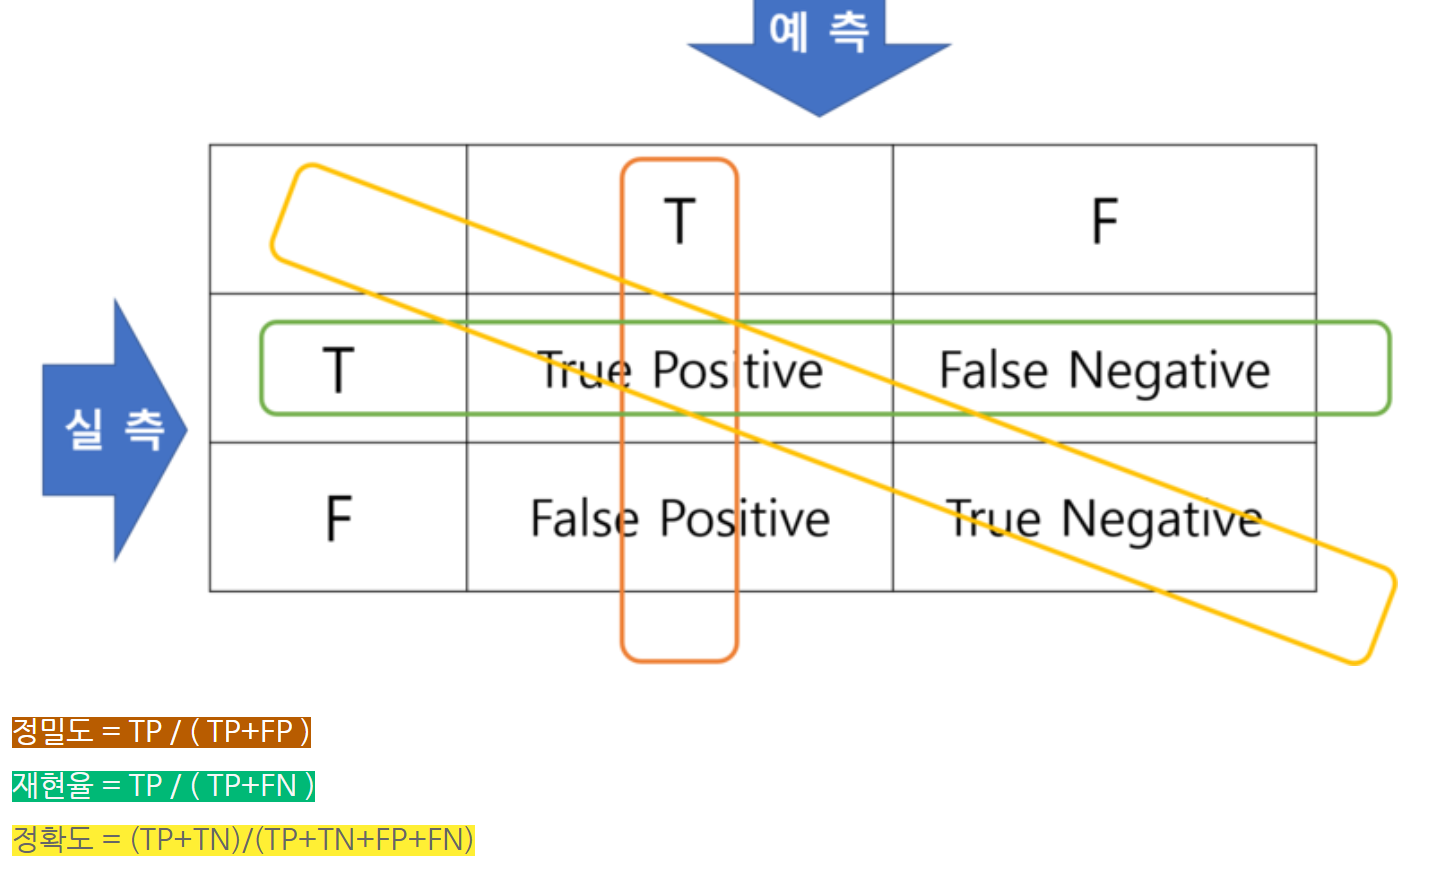

출처: https://blog.naver.com/thinketing/221585914260

* 불균형 데이터 해결 방법

가장 도움 많이 된 참고 영상: https://youtu.be/Vhwz228VrIk

#### Over sampling : 데이터의 분포가 작은 클래스의 값을 분포가 큰 클래스로 맞추는 방법
- Random Over Sampling, ADASYN, SMOTE, Borderline-SMOTE
- 장점: 정보의 손실 막을 수 있음
- 단점: 여러 유형의 관측치를 다수 추가하기 때문에 overfitting 유발

#### Under sampling: 데이터의 분포가 높은 값을 낮은 값으로 맞추는 방법
- Random Under Sampling, Tomek link, CNN, ENN
- 장점: 유의미한 데이터만 남길 수 있음, 시간 감소
- 단점: 정보 유실

#### 복합 sampling
- SMOTEENN (SMOTE + ENN)
- SMOTETomek (SMOTE + Tomek links)

** 랜덤 샘플링은 알고리즘을 거치지 않고 무작위로 데이터를 제거 혹은 추가 하기 때문에 과적합 등의 문제가 발생하기 쉬워 잘 쓰지 않음**

### Over Sampling- SMOTE

소수 범주에서 가상의 데이터를 생성하는 방법(모든 소수 범주 데이터에서 K개의 이웃들의 차이를 일정 값으로 만들어 기존 데이터와 약간 차이 나는 새로운 데이터 생성)(K>=2)

### Over Sampling- Borderline SMOTE

두 클래스 데이터 간의 경계선(보더라인) 부분에만 SMOTE를 적용한 모델(소수 클래스에 속하는 데이터 하나를 선정해 K개 주변을 탐색 후 
다수 클래스에 속하는 데이터 개수를 확인하여 보더라인 여부를 결정)

* k = 다수개수 : noise 관측치
* k/2 < 다수개수 < k: Danger 관측치 --> Borderline
* 0<= 다수개수 < k/2 : Safe 관측치

### Over Sampling- ADASYN

샘플링하는 개수를 위치에 따라 다르게(모든 소수 클래스에 대해 주변을 k개만큼 탐색하고 그 중 다수 클래스 관측치의 비율 계산해서 스케일링 한 후 [다수클래스개수- 소수클래스 개수]를 곱한 수 만큼 생성)

### Under Sampling- Tomek link

다른 클래스가 있을 때 서로 다른 클래스끼리 가장 가까운 데이터들이 토멕링크로 묶여서 토멕링크 중 분포가 높은 데이터를 제거하는 방법론(분포가 작은 클래스의 데이터에서 가장 가까운 분포가 높은 데이터의 위치를 찾는 것)

### Under Sampling- CNN

최근접인 클래스 분포 데이터를 삭제하면서 샘플링하는 방법론(소수범주 전체와 다수범주 하나로 서브데이터 구성-> 가장 가까운 범주 하나씩 골라서 분류-> 바뀌지 않은 데이터 삭제)(1-NN알고리즘 사용)

### Under Sampling- ENN

소수클래스 주변의 다수클래스 값 제거

### 데이터 설명(출처: kaggle)

* Male: male or female(Nominal)
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
* education
* Current Smoker: whether or not the patient is a current smoker (Nominal)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
* Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

#### Predict variable (desired target)
* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# 데이터 불러오기

In [2]:
# 데이터 불러오기
heart= pd.read_csv('C:/Users/82102/Desktop/framingham_heart_disease.csv')
heart.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

# EDA 및 시각화

In [3]:
heart.describe().T

count        mean        std     min     25%    50%  \
male             4238.0    0.429212   0.495022    0.00    0.00    0.0   
age              4238.0   49.584946   8.572160   32.00   42.00   49.0   
education        4133.0    1.978950   1.019791    1.00    1.00    2.0   
currentSmoker    4238.0    0.494101   0.500024    0.00    0.00    0.0   
cigsPerDay       4209.0    9.003089  11.920094    0.00    0.00    0.0   
BPMeds           4185.0    0.029630   0.169584    0.00    0.00    0.0   
prevalentStroke  4238.0    0.005899   0.076587    0.00    0.00    0.0   
prevalentHyp     4238.0    0.310524   0.462763    0.00    0.00    0.0   
diabetes         4238.0    0.025720   0.158316    0.00    0.00    0.0   
totChol          4188.0  236.721585  44.590334  107.00  206.00  234.0   
sysBP            4238.0  132.352407  22.038097   83.50  117.00  128.0   
diaBP            4238.0   82.893464  11.910850   48.00   75.00   82.0   
BMI              4219.0   25.802008   4.080111   15.54   23.07   25.4   
heartRate        4237.0   75.878924  12.026596   44.00   68.00   75.0   
glucose          3850.0   81.966753  23.959998   40.00   71.00   78.0   
TenYearCHD       4238.0    0.151958   0.359023    0.00    0.00    0.0   

                     75%    max  
male               1.000    1.0  
age               56.000   70.0  
education          3.000    4.0  
currentSmoker      1.000    1.0  
cigsPerDay        20.000   70.0  
BPMeds             0.000    1.0  
prevalentStroke    0.000    1.0  
prevalentHyp       1.000    1.0  
diabetes           0.000    1.0  
totChol          263.000  696.0  
sysBP            144.000  295.0  
diaBP             89.875  142.5  
BMI               28.040   56.8  
heartRate         83.000  143.0  
glucose           87.000  394.0  
TenYearCHD         0.000    1.0

In [4]:
report = pandas_profiling.ProfileReport(heart)

In [5]:
display(report)

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]